# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = 3x^{2}ln(x)+x^{2}$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [1]:
import numpy as np
def dy(x0):
    return 3 * x0**2 * np.log(x0) + x0**2

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [2]:
def get_min_with_gd(x0, iterations, learning_rate, threshold):
    history = [x0]
    x_i = x0
    
    for _ in range(iterations):
        x_i = x_i - learning_rate * dy(x_i)
        history.append(x_i)
        if np.abs(x_i - history[-2]) < threshold:
            break
    return history
         

In [3]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(x0 = 10, iterations = 1000, learning_rate = 0.01, threshold = 0.0001)

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

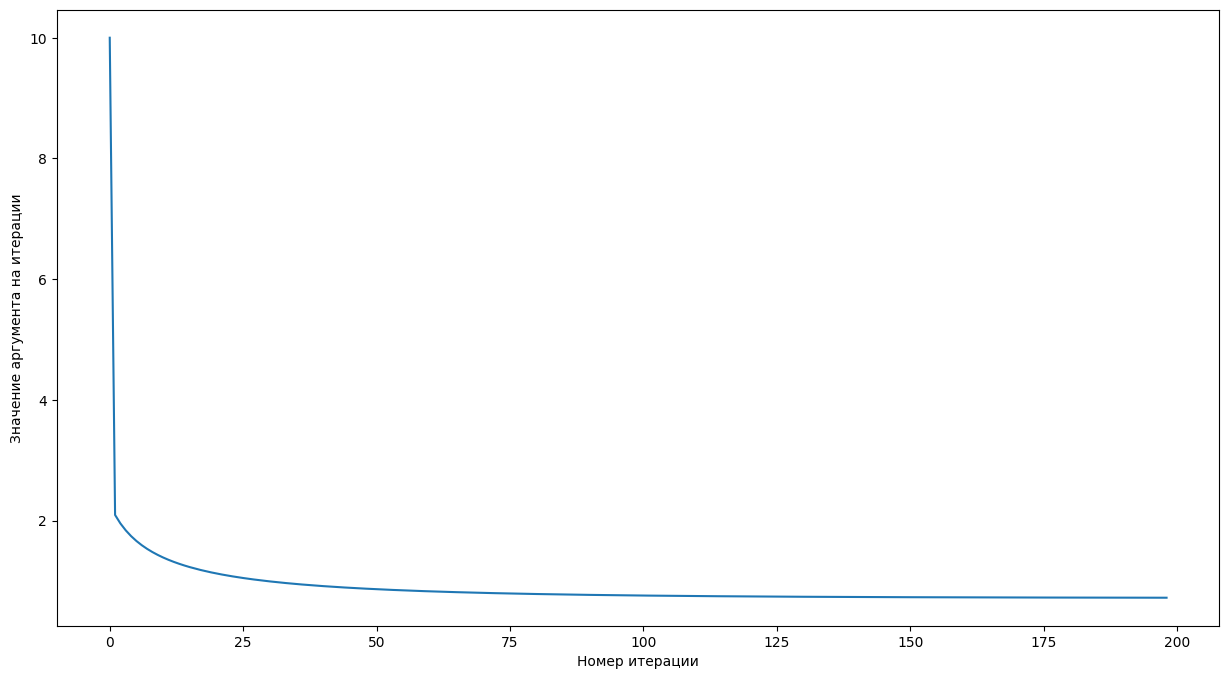

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [5]:
def get_min_with_rmsprop(x0, iterations, alpha, beta, threshold):
    epsilon = 0.000001
    history = [x0]
    x_i = x0
    gamma = 0
    for i in range(iterations):
        gamma = (1 - beta) * gamma + beta * dy(x_i)**2
        x_i = x_i - alpha / np.sqrt(gamma + epsilon) * dy(x_i)
        history.append(x_i)
        if np.abs(x_i-history[-2]) < threshold:
            break
    return history

In [26]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(x0=1, iterations=1000, alpha=0.001, beta=0.01, threshold=0.00001)
history_rmsprop_2 = get_min_with_rmsprop(x0=0.1, iterations=1000, alpha=0.001, beta=0.01, threshold=0.00001)

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

In [28]:
history_rmsprop_1[-1]

0.7168307020309852

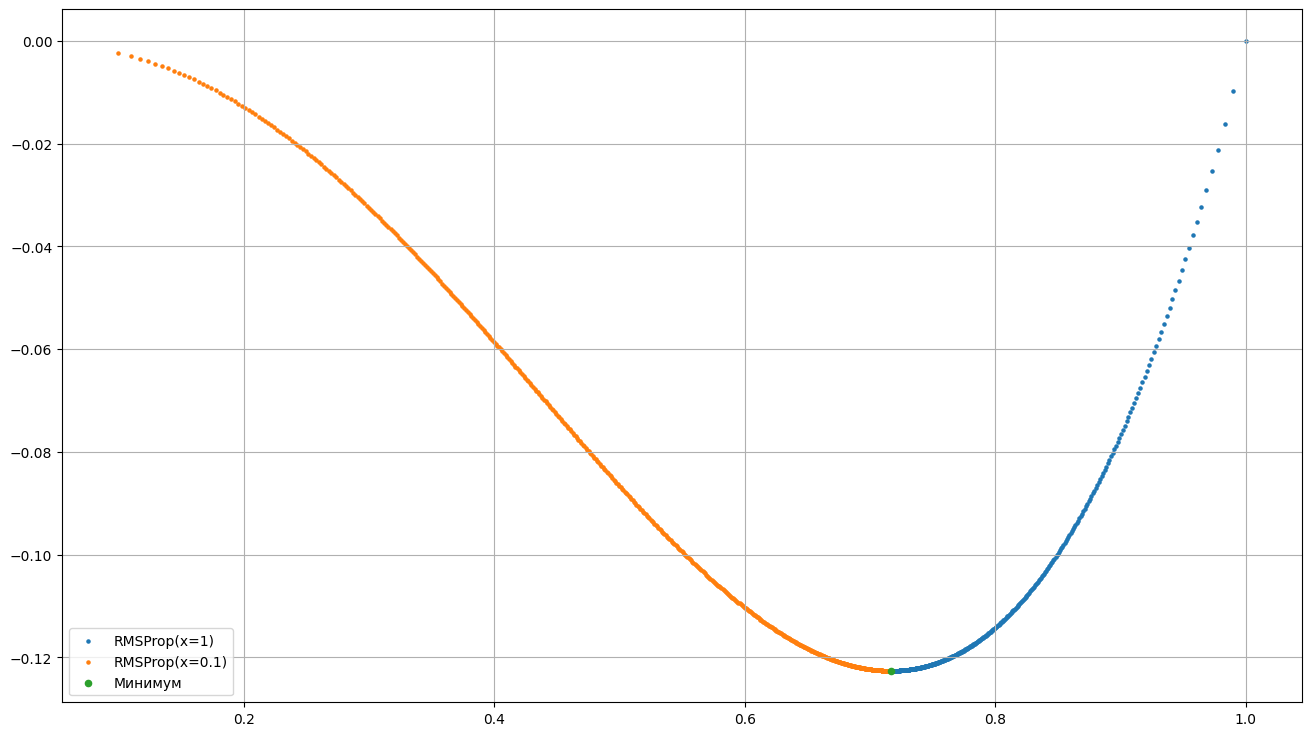

In [43]:
plt.figure(figsize=(16,9))
plt.grid()
y_1 = []
y_2 = []

for x in history_rmsprop_1:
    y_1.append((x**3) * np.log(x))


plt.scatter(history_rmsprop_1, y_1, s=5, label = 'RMSProp(x=1)')

for x in history_rmsprop_2:
    y_2.append((x**3) * np.log(x))
plt.scatter(history_rmsprop_2, y_2, s=5, label = 'RMSProp(x=0.1)')

x = 0.717
plt.scatter(x, (x**3) * np.log(x), label = 'Минимум', s=20)
plt.legend()